Assignment on Classification technique
Every year many students give the GRE exam to get admission in foreign Universities. The
data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating
(out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out
of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no,
1=yes). Admitted is the target variable.
Data Set: https://www.kaggle.com/mohansacharya/graduate-admissions
The counselor of the firm is supposed check whether the student will get an admission or not
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate
decisions build a machine learning model classifier using Decision tree to predict whether a
student will get admission or not.
a) Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if
necessary.
b) Perform data-preparation (Train-Test Split)
c) Apply Machine Learning Algorithm
d) Evaluate Model.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import plot_tree

In [3]:
data = pd.read_csv('Admission_Predict.csv')

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [7]:
data.shape

(400, 9)

In [8]:
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [10]:
data.fillna(0, inplace=True)
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


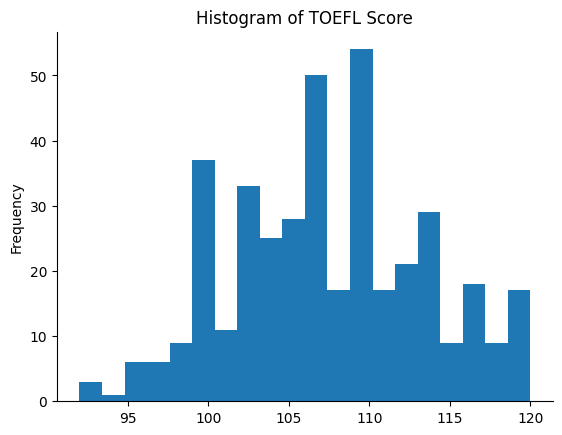

In [11]:
from matplotlib import pyplot as plt
data['TOEFL Score'].plot(kind = 'hist', bins = 20, title  = 'Histogram of TOEFL Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

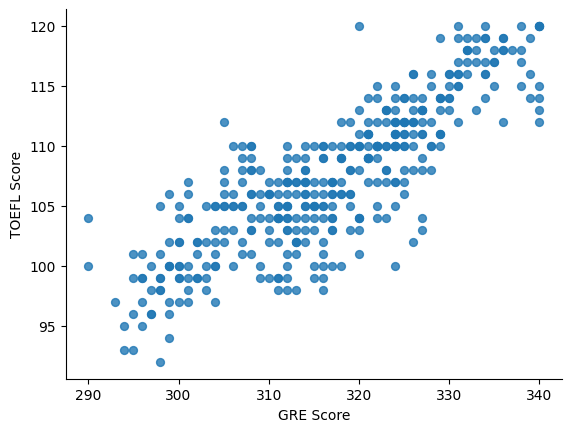

In [12]:
from matplotlib import pyplot as plt
data.plot(kind = 'scatter', x = 'GRE Score', y = 'TOEFL Score', s = 32, alpha = 0.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
label_encoder = LabelEncoder()
data['Research'] = label_encoder.fit_transform(data['Research'])

In [21]:
x = data[['GRE Score', 'CGPA']]
y = data['Chance of Admit ']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test = np.array(y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 2)
(80, 2)
(320,)
(80,)


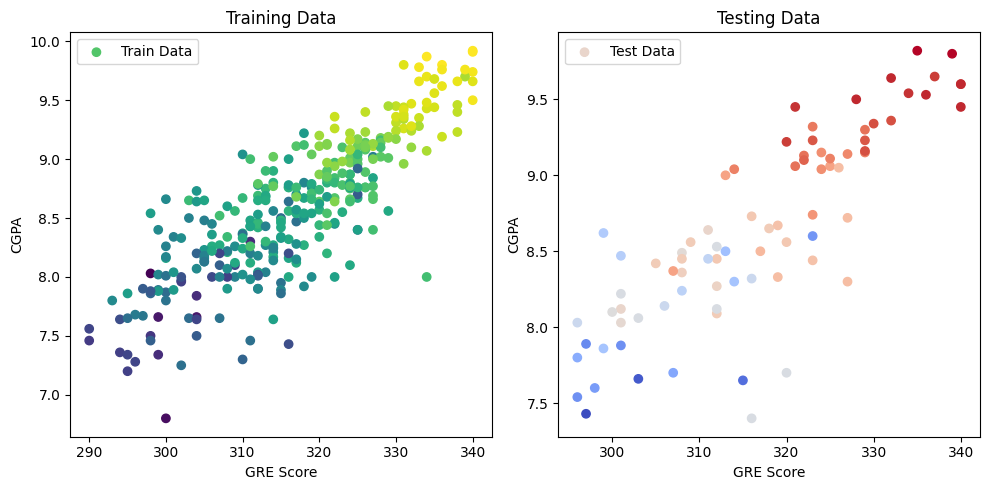

In [23]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_train['GRE Score'], x_train['CGPA'], c = y_train, cmap = 'viridis', marker = 'o', label = 'Train Data')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Training Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_test['GRE Score'], x_test['CGPA'], c = y_test, cmap = 'coolwarm', marker = 'o', label = 'Test Data')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('Testing Data')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
model = DecisionTreeClassifier(max_depth = 3, random_state = 42)
y_train_binary = (y_train > 0.5).astype(int)
model.fit(x_train, y_train_binary)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [26]:
y_pred = model.predict(x_test)
y_pred = np.array(y_pred)
print(y_pred.shape)

(80,)


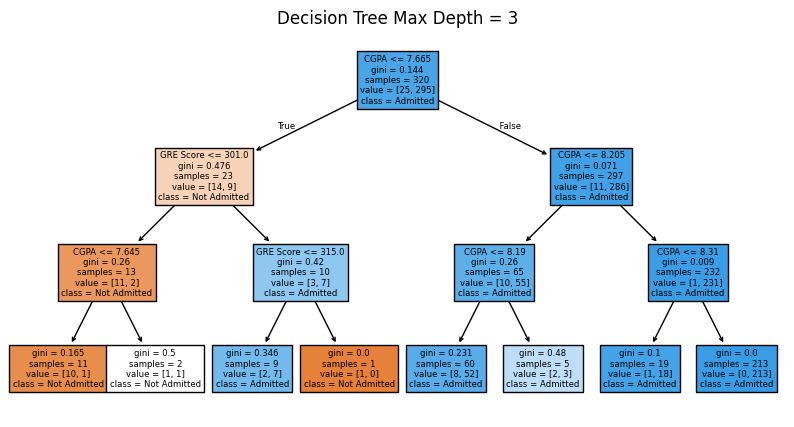

In [27]:
plt.figure(figsize = (10, 5))
plot_tree(model, filled = True, feature_names = x.columns, class_names = ['Not Admitted', 'Admitted'])
plt.title('Decision Tree Max Depth = 3')
plt.show()

In [29]:
y_test_binary = (y_test > 0.5).astype(int)

print("Model Evaluation:")
print("Accuracy:", metrics.accuracy_score(y_test_binary, y_pred))
print("Precision:", metrics.precision_score(y_test_binary, y_pred))
print("Recall:", metrics.recall_score(y_test_binary, y_pred))
print("F1 Score:", metrics.f1_score(y_test_binary, y_pred))

Model Evaluation:
Accuracy: 0.9
Precision: 0.9078947368421053
Recall: 0.9857142857142858
F1 Score: 0.9452054794520548


In [31]:
print("Mean Square Error: ", metrics.mean_squared_error(y_test_binary, y_pred))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test_binary, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test_binary, y_pred)))
print("R-Square: ", metrics.r2_score(y_test_binary, y_pred))

Mean Square Error:  0.1
Mean Absolute Error:  0.1
Root Mean Squared Error:  0.31622776601683794
R-Square:  0.08571428571428574
